In [1]:
%run my_functions.ipynb

In [2]:
#sat_formula = random_kcnf(n_literals=5,n_conjuncts=5,k=3)
sat_formula = [[1, 4, -5], [2, 3, 5], [-2, -4, 5], [-2, -4, -5], [3, 4, 5]]

5 3
1
[1, 4, 5]
[2, 3, 5]
[2, 4, 5]
[1, 4, 5]
[2, 3, 5]
[2, 4, 5]


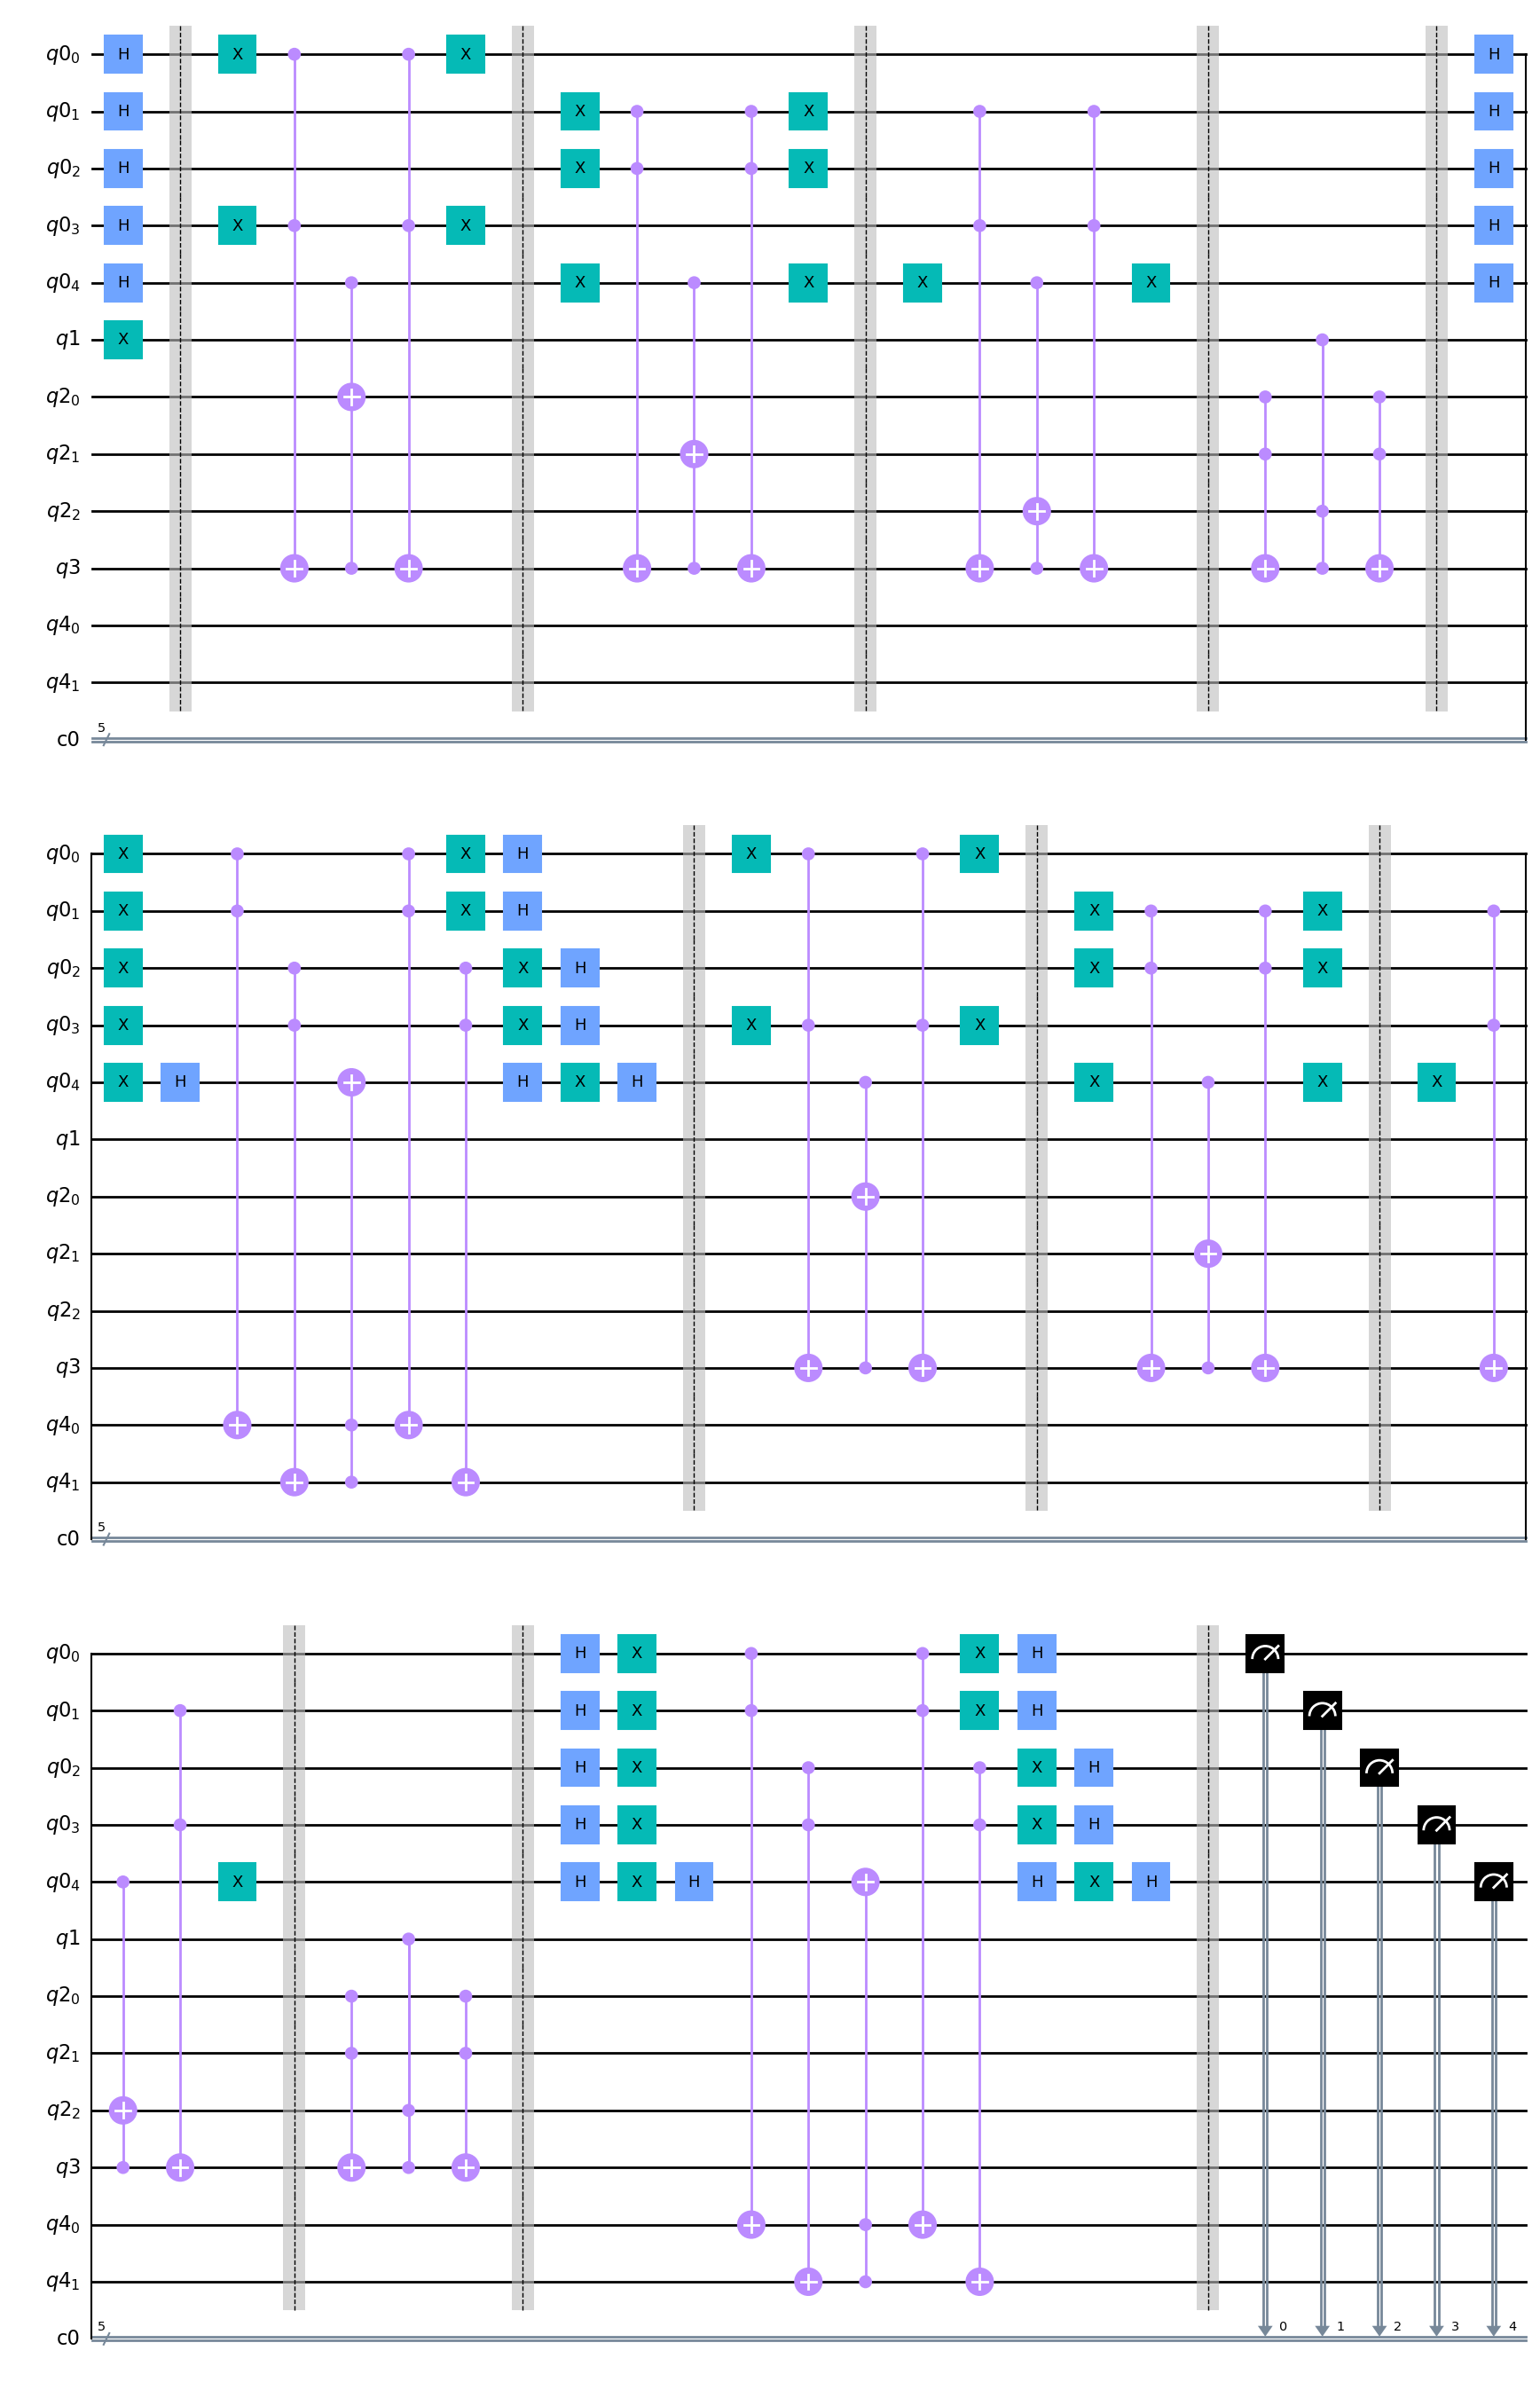

In [3]:
quant_part = [sat_formula[0]]+[sat_formula[1]] + [sat_formula[2]]
qc = hybrid_sat3(quant_part)
qc.draw('mpl')

In [4]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()
soln = []
all_soln = []
for key,value in counts.items():
    all_soln.append(key)
    if value>sum(counts.values())/len(counts):
        soln.append(key)

quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max values above average from the dictionary:", quant_soln)

Measurement results: {'01101': 237, '00010': 245, '10101': 229, '01110': 436, '10010': 462, '11100': 248, '00111': 224, '00011': 213, '01011': 466, '10000': 463, '00100': 206, '00001': 453, '00110': 249, '01001': 471, '00101': 220, '10001': 225, '11010': 231, '01010': 463, '10110': 436, '01111': 462, '10111': 223, '10100': 422, '11011': 233, '11111': 221, '11000': 202, '00000': 496, '11001': 207, '11110': 206, '11101': 226, '01000': 489, '01100': 209, '10011': 227}
Max values above average from the dictionary: ['01110', '01001', '11010', '00001', '10000', '10010', '01010', '01101', '11110', '00101', '00000', '00010']


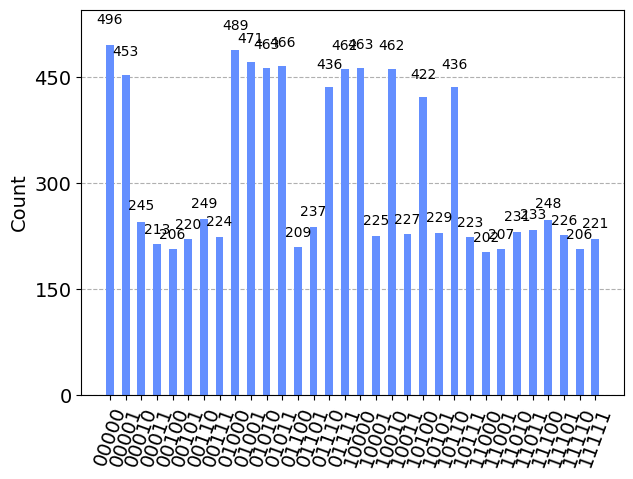

In [5]:
plot_histogram(counts)

In [6]:
brute_quant_soln = classical_sat_checker(quant_part,all_soln)

In [7]:
print(len(brute_quant_soln))
print(len(quant_soln))

20
12


In [8]:
if quant_soln == brute_quant_soln:
    print('quant_solutions match with brute force solutions')
else:
     print('quant_solutions Do NOT match with brute force solutions')   

if len(brute_quant_soln)<len(all_soln)/2 or len(brute_quant_soln)==len(all_soln)/2:
    print('Number of True Solutions are less than number of False solutions, thus quant_soln is expected to be same as brute force soln')
else:
    print('Number of True solutions are more, thus quant_soln is not the same as the brute force soln')

quant_solutions Do NOT match with brute force solutions
Number of True solutions are more, thus quant_soln is not the same as the brute force soln


The length of quantum_solution list is not same before and after verifying using classical_sat_checker because, we have used just the vanilla method off choosing the elements
which have more than the average probability of appearing. This method might sometimes consider non-solutions as solutions.

In [9]:
new_quant_soln = classical_sat_checker(quant_part,quant_soln)
if new_quant_soln==['No solution exists']:
    new_quant_soln = [i for i in all_soln if i not in quant_soln]
new_quant_soln

['10101',
 '11100',
 '00111',
 '00011',
 '01011',
 '00100',
 '00110',
 '10001',
 '10110',
 '01111',
 '10111',
 '10100',
 '11011',
 '11111',
 '11000',
 '11001',
 '11101',
 '01000',
 '01100',
 '10011']

In [10]:
len(new_quant_soln)

20

In [11]:
if new_quant_soln == brute_quant_soln:
    print('Solution for quantum part agrees with brute force solutions')

Solution for quantum part agrees with brute force solutions


In [12]:
classical_part = [sat_formula[3]]+[sat_formula[4]]
sat_solution = classical_sat_checker(classical_part,new_quant_soln)
sat_solution

['10101',
 '11100',
 '00111',
 '00011',
 '00100',
 '00110',
 '10001',
 '10110',
 '10111',
 '10100',
 '11001',
 '11101',
 '01100',
 '10011']

In [13]:
brute_full_soln = classical_sat_checker(sat_formula,all_soln)
brute_full_soln

['10101',
 '11100',
 '00111',
 '00011',
 '00100',
 '00110',
 '10001',
 '10110',
 '10111',
 '10100',
 '11001',
 '11101',
 '01100',
 '10011']

In [14]:
if sat_solution == brute_full_soln:
    print('Solution for the sat problem agrees with brute force solutions')
else:
    print('Solutions do not agree with brute force solutions')

Solution for the sat problem agrees with brute force solutions
